# TS4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal as sig
win = sig.windows

# Parámetros
N = 1000      #muestras
R = 200       #realizaciones
fs = N        #frecuencia de muestreo 
f0 = fs / 4   #frecuencia de la senoidal
resolucionEspectral=fs/N
frecRandom= np.random.uniform(low=-2, high=2, size=R)*resolucionEspectral #ojo que es un vector
frecRandom = frecRandom.reshape(1, R)

#tiempo en vector y matriz
Ts = 1/fs
t = np.linspace(0, (N-1)*Ts, N)            #vector de tiempo 
t_mat = np.tile(t.reshape(N, 1), (1, R))   #matriz 1000x200 (columnas = realizaciones)

#señal senoidal en matriz
a0 = 2
señalMatriz = a0 * np.sin(2*np.pi*(f0+frecRandom)*t_mat)   # matriz 1000x200

def SNRvarianza(señal, SNRdb):
    potSeñal = np.mean(señal**2)
    return potSeñal / (10**(SNRdb / 10))

Rvar = SNRvarianza(señalMatriz, 10)

#rudio pero matriz
ruidoMatriz = np.random.normal(0, np.sqrt(Rvar), (N, R))

#señal+ruido
señalConRuidoMatriz = señalMatriz + ruidoMatriz


#---------------RECTANGULAR---------------#

señalConRuidoFFT = fft(señalConRuidoMatriz, axis=0)/N #(osea sin ventanita)
espectroRect = 10*np.log10(2*np.abs(señalConRuidoFFT)**2)

a2 = 10*np.log10((np.abs(señalConRuidoFFT[N//4,:])**2)*2) #Estimador de amplitud

OmegaInd2 = np.argmax(np.abs(señalConRuidoFFT), axis=0)  #indice del bin de frecuencia donde aparece el pico maximo
freqOmega2 = OmegaInd2 * (fs/N) # paso de indice a frecuencia en Hz
Omega2 = np.mean(freqOmega2)  #estimador de la frecuencia

# idx_max_a2 = np.argmax(np.abs(señalConRuidoFFT), axis=0)  # índices de máximos
# freq_max_a2 = idx_max_a2 * (fs/N)                         # paso de índice a frecuencia en Hz
# freq_mean_a2 = np.mean(freq_max_a2) 

#---------------HAMMING---------------#
hamming = win.hamming(N).reshape(N,1)
señalRuidosaHamming = señalConRuidoMatriz * hamming
señalRuidosaHammingFFT = fft(señalRuidosaHamming, axis=0)/N
espectroHamming = 10*np.log10(2*np.abs(señalRuidosaHammingFFT)**2)

a3 = 10*np.log10((np.abs(señalRuidosaHammingFFT[N//4,:])**2)*2) #Estimador de amplitud

OmegaInd3 = np.argmax(np.abs(señalRuidosaHammingFFT), axis=0)  #indice del bin de frecuencia donde aparece el pico maximo
freqOmega3 = OmegaInd3 * (fs/N) # paso de indice a frecuencia en Hz
Omega3 = np.mean(freqOmega3) #estimador de la frecuencia

#---------------FLATTOP---------------#
flattop = win.flattop(N).reshape(N,1)
señalRuidosaFlattop = señalConRuidoMatriz * flattop
señalRuidosaFlattopFFT = fft(señalRuidosaFlattop, axis=0)/N
espectroFlattop = 10*np.log10(2*np.abs(señalRuidosaFlattopFFT)**2)

a4 = 10*np.log10((np.abs(señalRuidosaFlattopFFT[N//4,:])**2)*2) #Estimador de amplitud

OmegaInd4 = np.argmax(np.abs(señalRuidosaFlattopFFT), axis=0)  #indice del bin de frecuencia donde aparece el pico maximo
freqOmega4 = OmegaInd4 * (fs/N) # paso de indice a frecuencia en Hz
Omega4 = np.mean(freqOmega4) #estimador de la frecuencia

#---------------BLACKMANHARRIS---------------#
blackmanH = win.blackmanharris(N).reshape(N,1)
señalRuidosaBlackH = señalConRuidoMatriz * blackmanH
señalRuidosaBlackHFFT = fft(señalRuidosaBlackH, axis=0)/N
espectroBlackmanH = 10*np.log10(2*np.abs(señalRuidosaBlackHFFT)**2)

a5 = 10*np.log10((np.abs(señalRuidosaBlackHFFT[N//4,:])**2)*2) #Estimador de amplitud

OmegaInd5 = np.argmax(np.abs(señalRuidosaBlackHFFT), axis=0)  #indice del bin de frecuencia donde aparece el pico maximo
freqOmega5 = OmegaInd5 * (fs/N) # paso de indice a frecuencia en Hz
Omega5 = np.mean(freqOmega5) #estimador de la frecuencia


# señalConRuidoFFT = fft(señalConRuidoMatriz, axis=0)/N #(osea sin ventanita)
# a1 = 10*np.log10((np.abs(señalConRuidoFFT[N//4,:])**2)*2)


# %%

#-------PARA EL ESTIMADOR DE AMPLITUD---------#

a2_lin = np.sqrt(10**(a2/10))  # paso de dB a valor a lineal
a3_lin = np.sqrt(10**(a3/10))
a4_lin = np.sqrt(10**(a4/10))
a5_lin = np.sqrt(10**(a5/10))

#--------------- Rectangular ---------------#
a2prom = np.mean(a2_lin) #promedio de las amplitudes estimadas
sesgo_a2 = a2prom - a0  
var_a2 = np.var(a2_lin)   

#--------------- Hamming -------------------#
a3prom = np.mean(a3_lin)
sesgo_a3 = a3prom - a0
var_a3 = np.var(a3_lin)

#--------------- Flattop -------------------#
a4prom = np.mean(a4_lin)
sesgo_a4 = a4prom - a0
var_a4 = np.var(a4_lin)

#--------------- Blackman-Harris -----------#
a5prom = np.mean(a5_lin)
sesgo_a5 = a5prom - a0
var_a5 = np.var(a5_lin)


#-------PARA EL ESTIMADOR DE FRECUENCIA---------#

#--------------- Rectangular ---------------#
sesgo_f2 = Omega2 - f0                              # sesgo de frecuencia
var_f2 = np.var(freqOmega2)                              # varianza de frecuencia

#--------------- Hamming -------------------#
sesgo_f3 = Omega3 - f0
var_f3 = np.var(freqOmega3)

#--------------- Flattop -------------------#
sesgo_f4 = Omega4 - f0
var_f4 = np.var(freqOmega4)

#--------------- Blackman-Harris -----------#
sesgo_f5 = Omega5 - f0
var_f5 = np.var(freqOmega5)




print("ESTIMADOR DE AMPLITUD SNR:10dB")
print("--------------------------------")
print("VENTANA         SESGO_AMP      VAR_AMP")
print(f"Rectangular     {sesgo_a2:.4f}      {var_a2:.4f}")
print(f"Hamming         {sesgo_a3:.4f}      {var_a3:.4f}")
print(f"Flattop         {sesgo_a4:.4f}      {var_a4:.4f}")
print(f"Blackman-Harris {sesgo_a5:.4f}      {var_a5:.4f}")

# ---------- TABLA FRECUENCIA ----------
print("\nESTIMADOR DE FRECUENCIA SNR:10dB")
print("---------------------------------")
print("VENTANA         SESGO_FREQ     VAR_FREQ")
print(f"Rectangular     {sesgo_f2:.4f}      {var_f2:.4f}")
print(f"Hamming         {sesgo_f3:.4f}      {var_f3:.4f}")
print(f"Flattop         {sesgo_f4:.4f}      {var_f4:.4f}")
print(f"Blackman-Harris {sesgo_f5:.4f}      {var_f5:.4f}")

ESTIMADOR DE AMPLITUD SNR:10dB
--------------------------------
VENTANA         SESGO_AMP      VAR_AMP
Rectangular     -1.4845      0.2275
Hamming         -1.6527      0.0757
Flattop         -1.7239      0.0011
Blackman-Harris -1.6744      0.0188

ESTIMADOR DE FRECUENCIA SNR:10dB
---------------------------------
VENTANA         SESGO_FREQ     VAR_FREQ
Rectangular     92.4850      37718.0998
Hamming         89.9650      36917.8738
Flattop         94.9450      38472.0320
Blackman-Harris 84.9050      35272.7160


$$
\begin{array}{|c|c|c|}
\hline
\textbf{Estimación de Amplitud} & s_a & v_a \\ 
\hline
\text{Rectangular} & -1,5 & 0,227 \\ 
\hline
\text{Flat-top} & -1,7 & 0,001 \\ 
\hline
\text{Blackman Harris} & -1.8 & 0,018 \\ 
\hline
\text{Hamming} & -1.6 & 0,075 \\ 
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Estimación de Frecuencia} & s_a & v_a \\ 
\hline
\text{Rectangular} & 92,4 & 37718 \\ 
\hline
\text{Flat-top} & 94,9 & 38472 \\ 
\hline
\text{Blackman Harris} & 84,9 & 35272 \\ 
\hline
\text{Hamming} & 89,9 & 36917 \\ 
\hline
\end{array}
$$

Respecto al estimador de amplitud, se ve un sesgo negativo para todo las ventanas, lo que muestra que en promedio, la estimación obtenida es menor que el valor real del parámetro (mi amplitud $a_0=2$, es decir, el estimador está midiendo sistemáticamente por debajo del valor verdadero. Cuando analizamos la varianza podemos observar que posee un valor cercano a 0, este es un valor bueno ya que nos demuestra que las estimaciones son muy consistentes, es decir, cada realización del experimento devuelve casi el mismo valor de amplitud.]

Respecto al estimador de frecuencia, sse observa un sesgo muy alto, por lo que se entiende que se estan estimando valores que estan sistematicamente lejos del valor real del parametro (f0) que se está intentando medir, puede ser por la calidad del estimador, la cantidad de muestras o un error de la ejecucion del estimador po miparte en python. La varianza tambien resulta muy alta, lo que me indica estimaciones sumamente incosistentes.

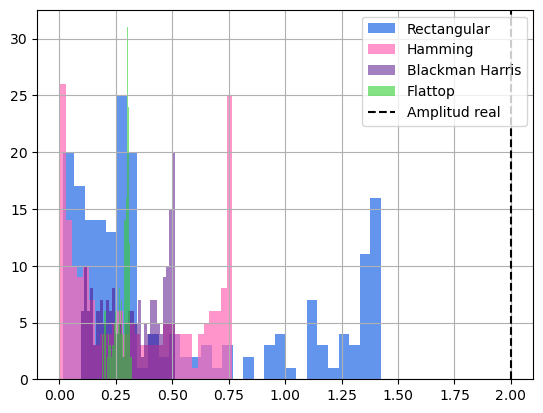

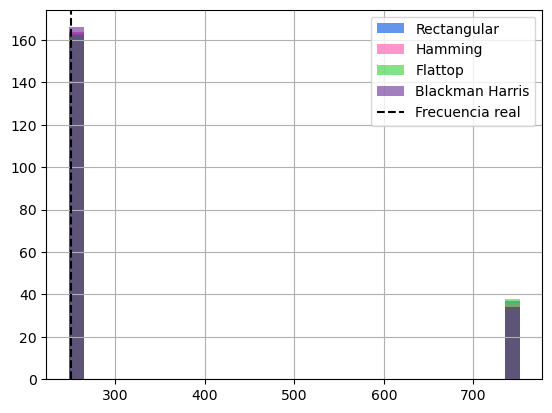

In [2]:
bins = 30


# ----------HISTOGRAMA DE AMPLITUD---------- #
plt.figure(7)
plt.hist(a2_lin,label='Rectangular', bins = bins, color = 'cornflowerblue')
plt.hist(a3_lin,label='Hamming', alpha = 0.7, bins = bins, color = 'hotpink')
plt.hist(a5_lin,label='Blackman Harris', alpha = 0.5, bins = bins, color = 'indigo')
plt.hist(a4_lin,label='Flattop', alpha = 0.6, bins = bins, color = 'limegreen')
plt.axvline(a0, color="k", linestyle="--", label="Amplitud real")
plt.legend()
plt.grid(True)
plt.show()

# ----------HISTOGRAMA DE FRECUENCIA---------- #
plt.figure(8)
plt.hist(freqOmega2,label='Rectangular', bins = bins, color = 'cornflowerblue')
plt.hist(freqOmega3,label='Hamming', alpha = 0.7, bins = bins, color = 'hotpink')
plt.hist(freqOmega4,label='Flattop', alpha = 0.6, bins = bins, color = 'limegreen')
plt.hist(freqOmega5,label='Blackman Harris', alpha = 0.5, bins = bins, color = 'indigo')
plt.axvline(f0, color="k", linestyle="--", label="Frecuencia real")
plt.legend()
plt.grid(True)
plt.show()


En el histograma para las ventanas con el estimador de amplitud podemos ver que se logra demostrar la tabla descripta anteriormente, se  puede ver claramente como, por ejemplo, con la ventana flattop tenemos la varianza mas pequeña, coincidiendo con el valor de la tabla que era de 0,001 V.